<a href="https://colab.research.google.com/github/Tanjib-Rafi/Multiple-Linear-Regression/blob/main/AdmissionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/Admission_Prediction.csv')
X = dataset.iloc[:, :8]
y = dataset.iloc[:, -1]

In [ ]:
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
print(X)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  
0           1  
1           1  
2  

In [ ]:
X1=X.drop('Serial No.',axis=1)

In [ ]:
X1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X1 = sc.fit_transform(X1)
y = sc.fit_transform(y.values.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape

(350, 7)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                96        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
35/35 [==============================] - 1s 1ms/step - loss: 0.5155 - mean_squared_error: 0.5155
Epoch 2/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 4/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 5/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 6/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 8/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 9/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 10/10
35/35 [=========

In [ ]:
acd = history.history['mean_squared_error']
loss = history.history['loss']

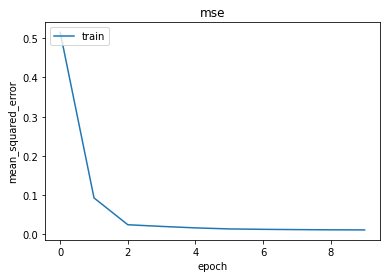

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
plt.plot(acd)
plt.title('mse')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('accuracy_curve.png')

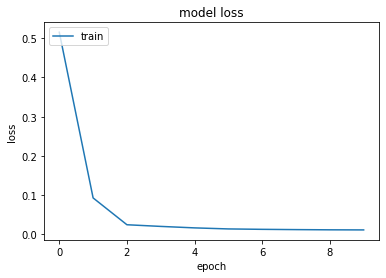

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0114 - mean_squared_error: 0.0114


In [ ]:
history_test

[0.01143092755228281, 0.01143092755228281]